# The Project #
1. This is a project with minimal scaffolding. Expect to use the the discussion forums to gain insights! It’s not cheating to ask others for opinions or perspectives!
2. Be inquisitive, try out new things.
3. Use the previous modules for insights into how to complete the functions! You'll have to combine Pillow, OpenCV, and Pytesseract
4. There are hints provided in Coursera, feel free to explore the hints if needed. Each hint provide progressively more details on how to solve the issue. This project is intended to be comprehensive and difficult if you do it without the hints.

### The Assignment ###
Take a [ZIP file](https://en.wikipedia.org/wiki/Zip_(file_format)) of images and process them, using a [library built into python](https://docs.python.org/3/library/zipfile.html) that you need to learn how to use. A ZIP file takes several different files and compresses them, thus saving space, into one single file. The files in the ZIP file we provide are newspaper images (like you saw in week 3). Your task is to write python code which allows one to search through the images looking for the occurrences of keywords and faces. E.g. if you search for "pizza" it will return a contact sheet of all of the faces which were located on the newspaper page which mentions "pizza". This will test your ability to learn a new ([library](https://docs.python.org/3/library/zipfile.html)), your ability to use OpenCV to detect faces, your ability to use tesseract to do optical character recognition, and your ability to use PIL to composite images together into contact sheets.

Each page of the newspapers is saved as a single PNG image in a file called [images.zip](./onlyread/images.zip). These newspapers are in english, and contain a variety of stories, advertisements and images. Note: This file is fairly large (~200 MB) and may take some time to work with, I would encourage you to use [small_img.zip](./readonly/small_img.zip) for testing.

Here's an example of the output expected. Using the [small_img.zip](./onlyread/small_img.zip) file, if I search for the string "Christopher" I should see the following image:
![Christopher Search](./onlyread/small_project.png)
If I were to use the [images.zip](./onlyread/images.zip) file and search for "Mark" I should see the following image (note that there are times when there are no faces on a page, but a word is found!):
![Mark Search](./onlyread/large_project.png)

Note: That big file can take some time to process - for me it took nearly ten minutes! Use the small one for testing.

In [1]:
import zipfile

from PIL import Image, ImageDraw
import pytesseract
import cv2 as cv
import numpy as np

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('onlyread/haarcascade_frontalface_default.xml')

from io import BytesIO #decode files
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'
# the rest is up to you!

In [5]:
##show rectangles with faces identified on image
def show_rects(faces,name):
    """
    name: name of image
    faces: list with array of faces position  
    """
    pil_img=Image.open(BytesIO(img[name])).convert("RGB")
    drawing=ImageDraw.Draw(pil_img)
    for x,y,w,h in faces:
        drawing.rectangle((x,y,x+w,y+h), outline="red")
    display(pil_img)  


# specifying the zip file name 
file_name = "./onlyread/small_img.zip"

#extract text and faces on images
def face_text(file):
    text = {} #Dictionary with text
    facesDetect = {} #Dictionary with faces position
    img = {} #dictionary with images
    names = [] #names of Images
    
    # opening the zip file in READ mode
    zippedImgs = zipfile.ZipFile(file_name)#,"r")
    zippedImgs.infolist()
    
    for i in range(len(zippedImgs.infolist())):
        file_in_zip = zippedImgs.namelist()[i] #name of the file in zipfile
        #print(file_in_zip, " ")
        data = zippedImgs.read(file_in_zip) #Read Data 
        names.append(file_in_zip)
        img[file_in_zip] = data
        
    #print(names)
    
    for i in range(len(names)):
        #Extraxt text
        imag = Image.open(BytesIO(img[names[i]])).convert('L')
        threshold = 80 #using treshold
        imag = imag.point(lambda p: p > threshold and 255)
        txt = pytesseract.image_to_string(imag)
        text[names[i]]=txt
        
        #Extract face position
        imge = cv.imdecode(np.frombuffer(img[names[i]], np.uint8), 1)
        gray = cv.cvtColor(imge, cv.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=5, minSize=(40,40))
        
        #show_rects(faces,names[i])
        facesDetect[names[i]]=faces
    return (names,text,facesDetect)

 text = {} #Dictionary with text
    facesDetect = {} #Dictionary with faces position
    img = {} #dictionary with images
    names = []

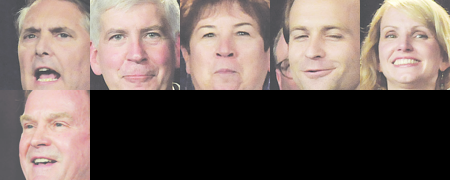

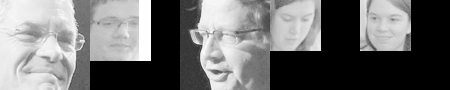

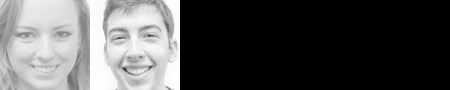

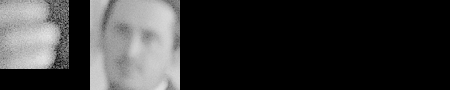

In [6]:
#height size of sheet with all faces
def rows(nPict):
    if nPict%5==0:
        return nPict//5
    else:
        return nPict//5 + 1

#def size of face
def resize(img, w, h):
    if img.width>w and img.height>h:
        val = img.resize((w,h), Image.ANTIALIAS)
    elif img.width>w and img.height<h:
        wpercent = (w / float(img.size[0]))
        hsize = int((float(img.size[1]) * float(wpercent)))
        val = img.resize((w, hsize), Image.ANTIALIAS)
    elif img.width<w and img.height>h:
        hpercent = (h / float(img.size[1]))
        wsize = int((float(img.size[0]) * float(hpercent)))
        val = img.resize((wsize, h), Image.ANTIALIAS) 
    else:
        val = img
    return val    

#Create an sheet with all faces
Sheets = {}

def faces_sheet(w, h):
    """
    w: weight of face image
    h: height of face image
    """
    for i in range(len(names)):
        oriImg = Image.open(BytesIO(img[names[i]])).convert("RGB")
        contact_sheet = Image.new("RGB", (5*w,rows(len(facesDetect[names[i]]))*h)) #new image 
        x = 0
        y = 0
        for face in facesDetect[names[i]]: #every face position
            crop=oriImg.crop((face[0],face[1],face[0]+face[2],face[1]+face[3]))
            crop.thumbnail((w,h))
            contact_sheet.paste(crop,(x,y))
            #faceimg = resize(crop,h,w)
            #contact_sheet.paste(faceimg,(x,y))
            if x+w == 5*w:
                x=0
                y=y+h
            else:
                x=x+w
        display(contact_sheet)
        Sheets[names[i]]=contact_sheet       

faces_sheet(90,90)        

results find in file a-0.png


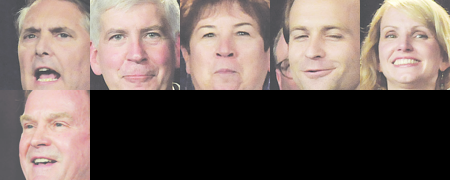

results find in file a-3.png


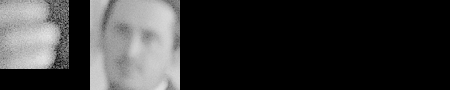

results find in file a-0.png


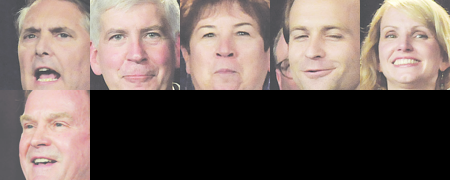

results find in file a-1.png


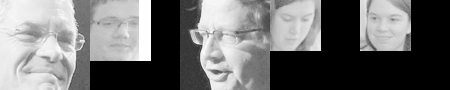

results find in file a-2.png


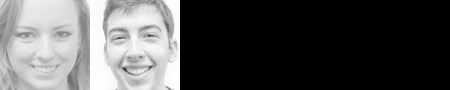

results find in file a-3.png


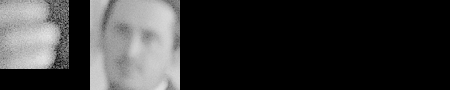

In [7]:
#Seek text and show image #final Statement
def seekTxt(txt):
    for i in range(len(names)):
        if txt in text[names[i]]:
            print('results find in file {}'.format(names[i]))
            if len(facesDetect[names[i]]) == 0:
                print('But there are no faces in that file')
            else:
                display(Sheets[names[i]])

seekTxt('Christopher') 
seekTxt('Mark') 
